In [1]:
#for some reason this is only working on Mac, not Lenovo
import osmnx as ox
%matplotlib inline

Evolved from the OSMnx tutorial from the creator

http://geoffboeing.com/2017/02/python-getting-started/

http://geoffboeing.com/2016/11/osmnx-python-street-networks/

In [3]:
G = ox.graph_from_place('San Francisco, California, USA', network_type='all_private')
#fig, ax = ox.plot_graph(ox.project_graph(G))

In [4]:
ox.save_graph_shapefile(G, filename='from_osmnx_2017_05_21_all_private')

# Test OpenStreetMap roads

In [1]:
#for some reason this is only working on Mac, not Lenovo
import osmnx as ox
%matplotlib inline

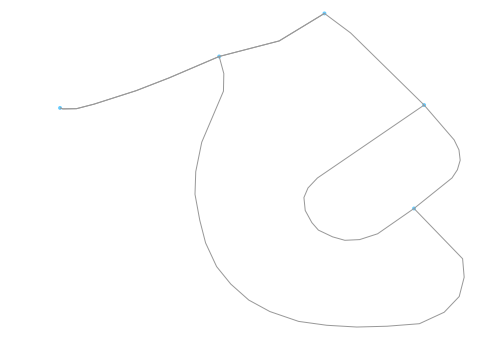

(<matplotlib.figure.Figure at 0x10ddb5e48>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1191c8f98>)

In [2]:
sg = ox.graph_from_point((37.7936516, -122.4503161), distance=100, network_type='all_private')
ox.plot_graph(sg)

In [8]:
sg_u = sg.to_undirected(True)

In [10]:
sg_u.get_edge_data(65283457,65283442)

{0: {'geometry': <shapely.geometry.linestring.LineString at 0x11989eeb8>,
  'highway': 'residential',
  'length': 41.625873375483273,
  'oneway': True,
  'osmid': 8915224}}

# Save in a multi-graph format

In [54]:
import osmnx as ox
from shapely.geometry import LineString

In [4]:
G = ox.graph_from_place('San Francisco, California, USA', network_type='all_private')

gu = G.to_undirected()

#convert nodes x/y to tuple
for n in gu.nodes():
    attr = gu.node[n]
    coord = (float(attr['x']), float(attr['y']))
    gu.node[n]['coordinate'] = coord
    
#edges w/o geometry are still legit, just straight shots
#use shapely to convert geos to list of tuples

for n0, n1 in gu.edges_iter():
    try:
        geo = gu[n0][n1][0]['geometry']
        gu[n0][n1][0]['coordinates'] = list(geo.coords)
    except: #no list? just use the nodes'
        gu[n0][n1][0]['coordinates'] = [gu.node[n0]['coordinate'], gu.node[n1]['coordinate']]

In [67]:
for a,b in G.edges_iter():
    try:
        l = len(G[b][a].keys())
    except:
        print(a,b)

65306635 2093154431
287834139 1472038598
287834139 1472038599
65306655 65306661
65306661 65290711
65339460 258913493
65339460 65301542
65306694 65341486
65306706 259399506
275513443 275513438
4216225894 65284433
4216225894 665558537
65372268 65336941
65372268 65336485
258965613 4406691924
258965616 1455172157
258965616 2069726478
258965618 2071244884
258965620 2071244903
65306741 65306764
65306741 65302248
2093154431 65311854
65306764 633361166
346521744 4783986982
65306787 2322615160
65306789 890045131
65306793 65306795
65306793 869969308
1636827304 4183593341
65306795 65334514
65306795 3176140241
65306797 65306800
65306800 65306802
65306802 65317532
65306802 65300085
65306804 302742529
65306804 65306810
65306810 65306812
65306812 65325183
65306812 65293753
65306815 65306817
65339584 65301621
65306817 65293433
65306819 65306822
65306819 65317557
65306822 65306825
65306825 65306827
65306827 3687459641
65306827 65345191
65306829 65297956
65306829 3687459637
65306832 65317569
65306832 65

In [71]:
print(G.node[258965618],
G.node[2071244884])

{'y': 37.7991793, 'x': -122.3977885, 'osmid': 258965618, 'highway': 'traffic_signals'} {'y': 37.7990701, 'x': -122.3976919, 'osmid': 2071244884, 'highway': 'crossing'}


In [6]:
import networkx as nx

In [7]:
#then save
nx.write_gpickle(gu, '2017_05_29 all_private cleaned_coords.gpickle')

# Scratch

In [1]:
import osmnx as ox

In [2]:
G = ox.graph_from_place('San Francisco, California, USA', network_type='all_private')

'''given a MultiDiGraph, construct a MultiGraph that does NOT lose edges
    will not be a MultiGraph, just will have redundant edges
'''
#input a MultiDiGraph, return a MultiDiGraph with every edge plus its flipped duplicate
def copy_edges_flipped(sg):

    #create a new graph where we'll append complementary edges
    sg_new = sg.copy()

    for a,b in sg.edges_iter():
        ab = sg[a][b][0]

        #does this edge have a reverse edge?
        if sg.has_edge(b,a):    
            ba = sg[b][a][0]
            #if it's different, add it to this edge
            if ab['length'] != ba['length']:
                next_key = len(sg_new[a][b].keys())
                sg_new[a][b][next_key] = ba
            else:
                continue

        #if edge doesn't exist, create it
        else:
            sg_new[b][a] = sg[a][b]
    
    return sg_new

print('finished')

In [5]:
gu = copy_edges_flipped(G)

In [6]:
#convert nodes x/y to tuple
for n in gu.nodes():
    attr = gu.node[n]
    coord = (float(attr['x']), float(attr['y']))
    gu.node[n]['coordinate'] = coord

In [12]:
#edges w/o geometry are still legit, just straight shots
#use shapely to convert geos to list of tuples

for n0, n1 in gu.edges_iter():
    for k in gu[n0][n1]:
        try:
            geo = gu[n0][n1][k]['geometry']
            gu[n0][n1][k]['coordinates'] = list(geo.coords)
        except: #no list? just use the nodes'
            gu[n0][n1][k]['coordinates'] = [gu.node[n0]['coordinate'], gu.node[n1]['coordinate']]

In [13]:
import networkx as nx

In [14]:
#then save
nx.write_gpickle(gu, '2017_06_08 all_private cleaned_coords real_multidi.gpickle')